# Лабораторная работа №1
## ПРОГНОЗИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ НА ОСНОВЕ МЕТОДА SSA – «ГУСЕНИЦА»
Комлева Юлия Владимировна

Вариант: 9

Группа: РИМ-281226
## 3 кратные сезонные компоненты + шум.

In [1]:
import numpy as np
import numpy.random as rand
import random
import matplotlib.pyplot as plt
import h5py
import numpy as np
import numpy.random as rand
%matplotlib inline

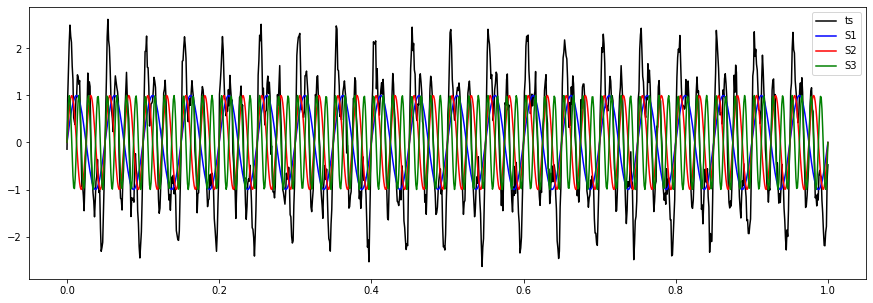

In [3]:
random.seed(13)
np.random.seed(13)

t = np.linspace(0, 1, 1024)

#линейная частота сезона
f = 10 #P = 1/10

S1 = np.sin(2*np.pi*2*f*t)
S2 = np.sin(2*np.pi*4*f*t)
S3 = np.sin(2*np.pi*8*f*t)

noise = 0.2*rand.randn(len(t))

F = S1 + S2 + S3 + noise

N = 1024

plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, S1, 'b', label = 'S1')
plt.plot(t, S2, 'r', label = 'S2')
plt.plot(t, S3, 'g', label = 'S3')
plt.legend()
plt.show()

In [4]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    #шаг вложения
    for i in range(0, L): #rows
        for j in range(0, K):
            X[i,j] = F[i+j]
    #X = np.column_stack([F[i:i+L] for i in range(0,K)])
    #шаг сингулярного разложени]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    # U - матрица собственных векторов
    # A - массив собственных чисел (в неубывающем порядке)
    V = np.dot(X.T, U) #матрица траекторных векторов
    return A, U, V
def SSA_group(A, U, V, N, I):
    
    L = len(A)
    K = N - L + 1

    #шаг группировки
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    #этап диагонального усреднения
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)    
    
    for k in range(0, L_):
        for m in range(0, k + 1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(k+1)
    for k in range(L_, K_):
        for m in range(0, L_):    
            G[k] += Z[m][k-m]   
        G[k] *= 1/L_
    for k in range(K_, N):
        for m in range(k-K_+1, N-K_+1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(N-k)
    return G


#### Выбор ширины окна L

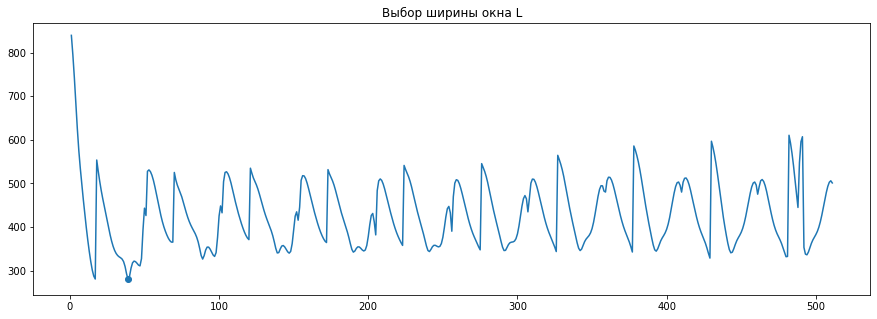

In [5]:
arr = []
tL = range(1, N//2)

for i in range(1, N//2):
    A, U, V = SSA_modes(F, i)
    ssaF = SSA_group(A, U, V, N, [0])
    arr.append(sum(abs(S1 -ssaF)))
    
L = np.argmin(arr)+1

plt.figure(figsize = (15, 5))
plt.title("Выбор ширины окна L")
plt.plot(tL, arr)

plt.scatter(L, arr[L-1])


plt.show()

In [6]:
L

39

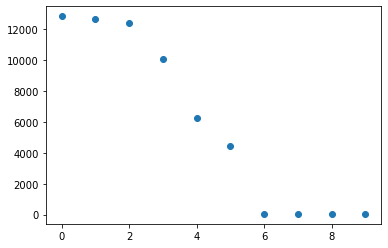

In [8]:
L = 39
A, U, V = SSA_modes(F, L)
plt.scatter(range(10),A[:10])
plt.show()

In [9]:
A, U, V = SSA_modes(F, L)
ssaF0 = SSA_group(A, U, V, N, [0])
ssaF1 = SSA_group(A, U, V, N, [1])
ssaF2 = SSA_group(A, U, V, N, [2])
ssaF3 = SSA_group(A, U, V, N, [3])
ssaF4 = SSA_group(A, U, V, N, [4])
ssaF5 = SSA_group(A, U, V, N, [5])

ssaF01 = SSA_group(A, U, V, N, [0, 1])
ssaF02 = SSA_group(A, U, V, N, [0, 2])
ssaF03 = SSA_group(A, U, V, N, [0, 3])
ssaF04 = SSA_group(A, U, V, N, [0, 4])
ssaF05 = SSA_group(A, U, V, N, [0, 5])

ssaF12 = SSA_group(A, U, V, N, [1, 2])
ssaF13 = SSA_group(A, U, V, N, [1, 3])
ssaF14 = SSA_group(A, U, V, N, [1, 4])
ssaF15 = SSA_group(A, U, V, N, [1, 5])

ssaF23 = SSA_group(A, U, V, N, [2, 3])
ssaF24 = SSA_group(A, U, V, N, [2, 4])
ssaF25 = SSA_group(A, U, V, N, [2, 5])

ssaF34 = SSA_group(A, U, V, N, [3, 4])
ssaF35 = SSA_group(A, U, V, N, [3, 5])

ssaF45 = SSA_group(A, U, V, N, [4, 5])

ssaF234 = SSA_group(A, U, V, N, [2, 3, 4])

ssaF6 = SSA_group(A, U, V, N, [6]) # уже лишнее

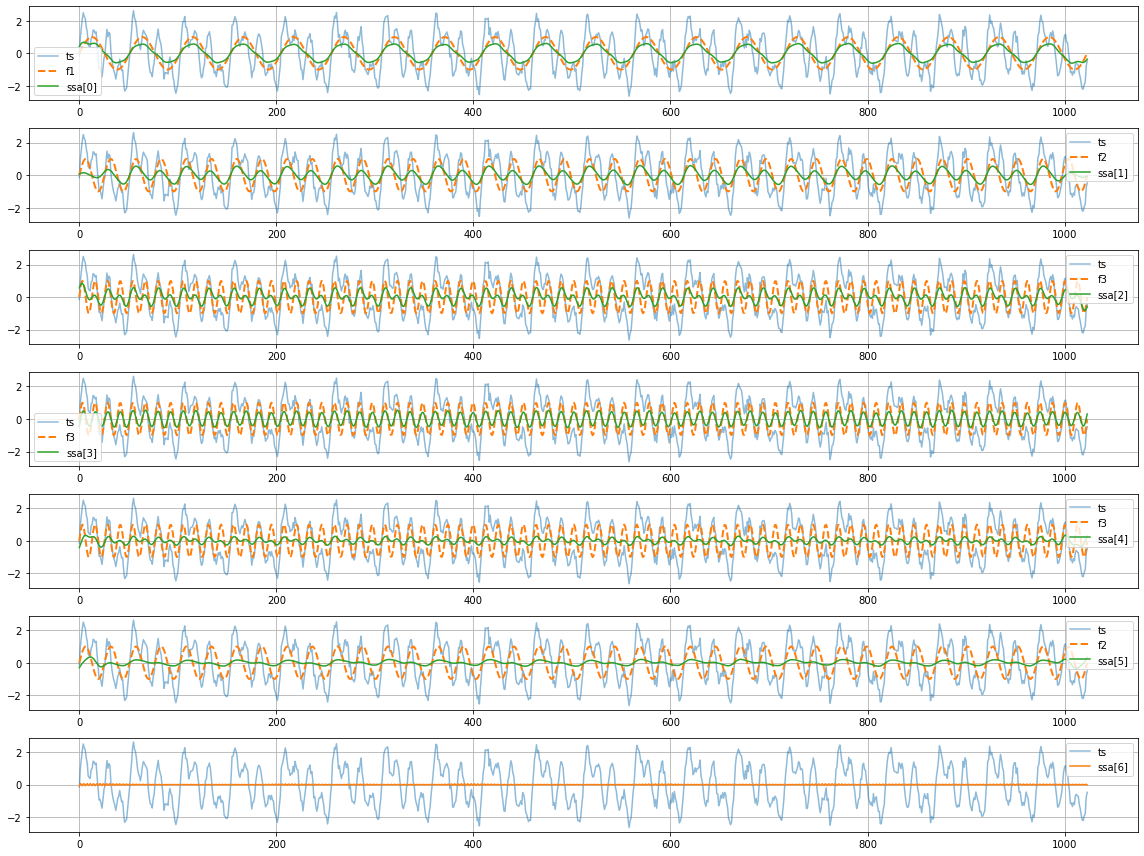

In [10]:
fig, ax = plt.subplots(7, 1, figsize=(16, 12), sharey = True)

ax[0].plot(F, label = 'ts', alpha=0.5)
ax[0].plot(range(1024), S1, ls = '--', lw = 2, label = 'f1')
ax[0].plot(ssaF0, label = 'ssa[0]')

ax[1].plot(F, label = 'ts', alpha=0.5)
ax[1].plot(range(1024), S2, ls = '--', lw = 2, label = 'f2')
ax[1].plot(ssaF1, label = 'ssa[1]')

ax[2].plot(F, label = 'ts', alpha=0.5)
ax[2].plot(range(1024), S3, ls = '--', lw = 2, label = 'f3')
ax[2].plot(ssaF2, label = 'ssa[2]')

ax[3].plot(F, label = 'ts', alpha=0.5)
ax[3].plot(range(1024), S3, ls = '--', lw = 2, label = 'f3')
ax[3].plot(ssaF3, label = 'ssa[3]')

ax[4].plot(F, label = 'ts', alpha=0.5)
ax[4].plot(range(1024), S3, ls = '--', lw = 2, label = 'f3')
ax[4].plot(ssaF4, label = 'ssa[4]')

ax[5].plot(F, label = 'ts', alpha=0.5)
ax[5].plot(range(1024), S2, ls = '--', lw = 2, label = 'f2')
ax[5].plot(ssaF5, label = 'ssa[5]')

ax[6].plot(F, label = 'ts', alpha=0.5)
ax[6].plot(ssaF6, label = 'ssa[6]')



for a in ax.flat:
    a.grid()
    a.legend()



plt.tight_layout()
plt.show()

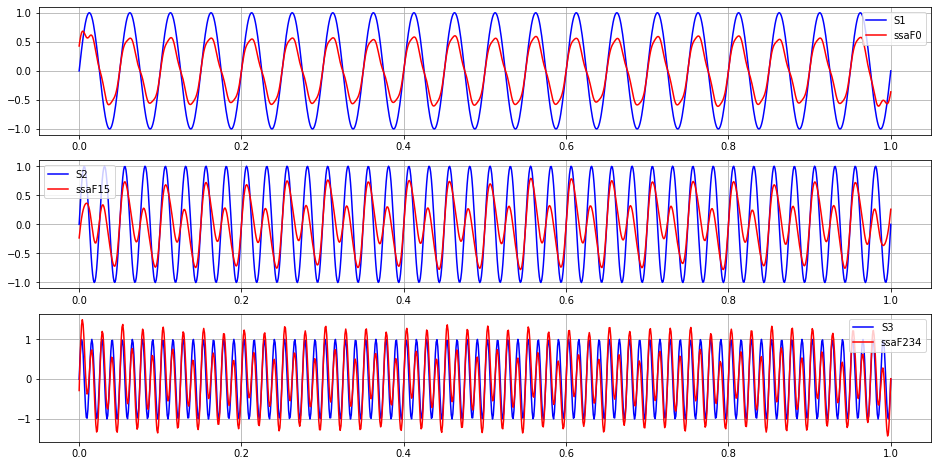

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(16, 8))
ax[0].plot(t, S1, 'b', label='S1')
ax[0].plot(t, ssaF0, 'r', label='ssaF0')

ax[1].plot(t, S2, 'b', label='S2')
ax[1].plot(t, ssaF15, 'r', label='ssaF15')

ax[2].plot(t, S3, 'b', label='S3')
ax[2].plot(t, ssaF234, 'r', label='ssaF234') 

for a in ax.flat:
    a.grid()
    a.legend()
plt.show()

In [12]:
M = 1024//20
M

51

In [13]:
S1[51], S1[52]

(-0.01842472076386426, 0.10422304459177693)

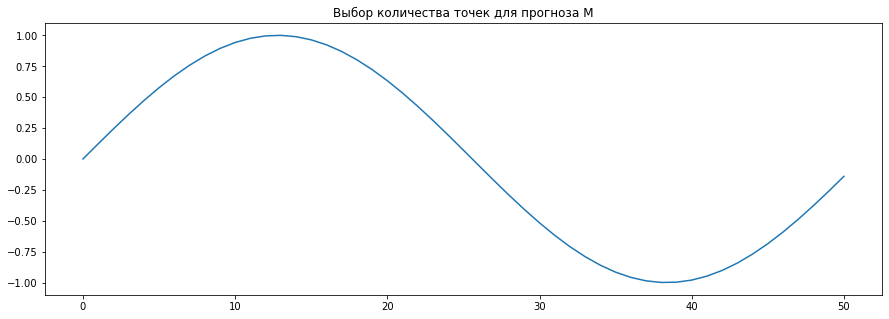

In [14]:
plt.figure(figsize = (15, 5))
plt.title("Выбор количества точек для прогноза М")
plt.plot(S1[0:M], label='S');

## SSA-R

In [26]:
def SSA_R(F, N, L, M, I):
    A, U, V = SSA_modes(F, L)
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    Q = F 
    for i in range(N, N + M): 
        ag = [] 
        for j in range(0, L-2): 
            ag.append(R[j] * Q[i-j-1]) 
        Q = np.append(Q, sum(ag))
    return Q

In [27]:
I = [0, 1, 2, 3, 4, 5]
N_part = N - M
F_part = F[:N_part]
MAE = []
for l in range(7, N_part//2):
    Q = SSA_R(F_part, N_part, l, M, I) #22
    MAE.append(sum(abs(Q - F)))
L = np.argmin(MAE[1:len(MAE)]) + 7
L

357

In [28]:
Q-F

array([0.        , 0.        , 0.        , ..., 1.20325626, 0.79000713,
       1.0925044 ])

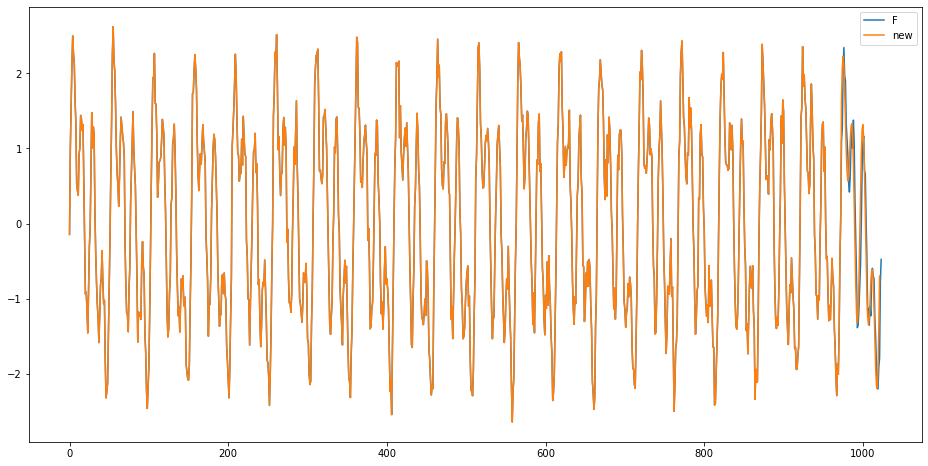

In [31]:
Q = SSA_R(F_part, N_part, L, M, I) #22
plt.figure(figsize=(16, 8))
plt.plot(F, label='F')
plt.plot(Q[:-2], label='new')

plt.legend()
plt.show()

## SSA-S

In [34]:
def SSA_S(F, N, L, M, I):
    for f_new in range(M):
        #print(f_new)
        F = np.append(F, random.uniform(min(F), max(F)))
        while True:
            
            N = len(F)
            # шаг вложения + шаг сингулярного разложения
            A, U, V = SSA_modes(Q, L) 
            L = len(A)
            K = N - L + 1

            #шаг группировки
            V = V.transpose()
            Z = np.dot(U[:, I], V[I, :])

            #этап диагонального усреднения
            G = np.zeros(N)
            L_ = min(L, K)
            K_ = max(L, K)    
    
            for k in range(0, L_):
                for m in range(0, k + 1):
                    G[k] += Z[m][k-m]
                G[k] *= 1/(k+1)
            for k in range(L_, K_):
                for m in range(0, L_):    
                    G[k] += Z[m][k-m]   
                G[k] *= 1/L_
            for k in range(K_, N):
                for m in range(k-K_+1, N-K_+1):
                    G[k] += Z[m][k-m]
                G[k] *= 1/(N-k)

            
            
            if round(F[-1],5) - round(G[-1],5) == 0:
                break
            else:
                F[-1] = G[-1]
    return F

In [ ]:
%%time
MAE = []
for l in range(7, N_part//2):
    Q = SSA_S(F_part, N_part, l, M, I) #22
    MAE.append(sum(abs(Q - F)))
L = np.argmin(MAE[1:len(MAE)]) + 7
L

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(S, label = 'S')
plt.plot(Q, label = 'new')
plt.axvline(N_part)
plt.grid()
plt.legend()
plt.show()

## 2. Fort.mat

In [ ]:
file = h5py.File('Fort.mat','r')
data = file.get('Fort')
fort = np.array(data)
F = np.ravel(fort)
N_fort = len(F)
plt.figure(figsize = (10, 5))
plt.plot(F)
plt.show()

In [ ]:
L_fort = 84 #12
A, U, V = SSA_modes(F, L_fort)
ssaF0 = SSA_group(A, U, V, N_fort, [0])
ssaF1 = SSA_group(A, U, V, N_fort, [1])
ssaF2 = SSA_group(A, U, V, N_fort, [2])
ssaF3 = SSA_group(A, U, V, N_fort, [3])
ssaF4 = SSA_group(A, U, V, N_fort, [4])
ssaF5 = SSA_group(A, U, V, N_fort, [5])

ssaF01 = SSA_group(A, U, V, N_fort, [0, 1])
ssaF02 = SSA_group(A, U, V, N_fort, [0, 2])
ssaF03 = SSA_group(A, U, V, N_fort, [0, 3])
ssaF04 = SSA_group(A, U, V, N_fort, [0, 4])
ssaF05 = SSA_group(A, U, V, N_fort, [0, 5])

ssaF12 = SSA_group(A, U, V, N_fort, [1, 2])
ssaF13 = SSA_group(A, U, V, N_fort, [1, 3])
ssaF14 = SSA_group(A, U, V, N_fort, [1, 4])
ssaF15 = SSA_group(A, U, V, N_fort, [1, 5])

ssaF23 = SSA_group(A, U, V, N_fort, [2, 3])
ssaF24 = SSA_group(A, U, V, N_fort, [2, 4])
ssaF25 = SSA_group(A, U, V, N_fort, [2, 5])

ssaF34 = SSA_group(A, U, V, N_fort, [3, 4])
ssaF35 = SSA_group(A, U, V, N_fort, [3, 5])

ssaF45 = SSA_group(A, U, V, N_fort, [4, 5])

ssaF234 = SSA_group(A, U, V, N_fort, [2, 3, 4])

ssaF56 = SSA_group(A, U, V, N_fort, [5, 6])
ssaF6 = SSA_group(A, U, V, N_fort, [6])

In [ ]:

fig, ax = plt.subplots(7, 1, figsize=(16, 12), sharey = True)

ax[0].plot(F, label = 'ts', alpha=0.5)
ax[0].plot(ssaF0, label = 'ssa[0]')

ax[1].plot(F, label = 'ts', alpha=0.5)
ax[1].plot(ssaF1, label = 'ssa[1]')

ax[2].plot(F, label = 'ts', alpha=0.5)
ax[2].plot(ssaF2, label = 'ssa[2]')

ax[3].plot(F, label = 'ts', alpha=0.5)
ax[3].plot(ssaF3, label = 'ssa[3]')

ax[4].plot(F, label = 'ts', alpha=0.5)
ax[4].plot(ssaF4, label = 'ssa[4]')

ax[5].plot(F, label = 'ts', alpha=0.5)
ax[5].plot(ssaF5, label = 'ssa[5]')

ax[6].plot(F, label = 'ts', alpha=0.5)
ax[6].plot(ssaF6, label = 'ssa[6]')



for a in ax.flat:
    a.grid()
    a.legend()



plt.tight_layout()
plt.show()

In [ ]:
t_fort = np.linspace(0, 1, N_fort)
fig, ax = plt.subplots(4, 1, figsize=(16, 8))

ax[0].plot(t_fort, ssaF0, 'r', label='ssaF0')


ax[1].plot(t_fort, ssaF12, 'r', label='ssaF12')


ax[2].plot(t_fort, ssaF34, 'r', label='ssaF34') 

ax[3].plot(t_fort, ssaF56, 'r', label='ssaF56') 
for a in ax.flat:
    a.grid()
    a.legend()
plt.show()

In [ ]:
M_fort = 50
N_fort = len(F)
F_part = F[0:N_fort-M_fort]
N_fort_part = len(F_part)
L_fort = 82
I_fort = [0,1,2,3,4,5,6]
print(M_fort, N_fort, N_fort_part, L_fort)


MAE_fort = []
for l in range(7, N_fort_part//2):
    Q_fort = SSA_R(F_part, N_fort_part, l, M_fort, I_fort) #22
    MAE_fort.append(sum(abs(Q_fort-F)))
L_fort = np.argmin(MAE_fort[1:len(MAE_fort)]) + 7
L_fort

In [ ]:
L_fort = 23
Q_fort = SSA_R(F_part, N_fort_part, L_fort, M_fort, I_fort)
plt.figure(figsize=(16, 8))
plt.plot(range(0, N_fort_part + M_fort ), Q_fort, label='Q')
#plt.plot(range(0, N_part), F_part, label='S')
plt.plot(range(0, N_fort), F, label='S')
plt.axvline(N_fort_part)
plt.legend()
plt.show()

## 3. SSA-S
Cтохастический SSA-прогноз
метод прогноза на основе SSA с итерационной аппроксимацией

In [ ]:
N = len(S)
M = 200
N_part = N - M
L = 17
S_part = S[: N_part]
I=[0,1,2,3,4,5]

In [ ]:
def SSA_S(F, N, L, M, I):
    for f_new in range(M):
        print(f_new)
        F = np.append(F, random.uniform(min(F), max(F)))
        while True:
            
            N = len(F)
            # шаг вложения + шаг сингулярного разложения
            A, U, V = SSA_modes(Q, L) 
            L = len(A)
            K = N - L + 1

            #шаг группировки
            V = V.transpose()
            Z = np.dot(U[:, I], V[I, :])

            #этап диагонального усреднения
            G = np.zeros(N)
            L_ = min(L, K)
            K_ = max(L, K)    
    
            for k in range(0, L_):
                for m in range(0, k + 1):
                    G[k] += Z[m][k-m]
                G[k] *= 1/(k+1)
            for k in range(L_, K_):
                for m in range(0, L_):    
                    G[k] += Z[m][k-m]   
                G[k] *= 1/L_
            for k in range(K_, N):
                for m in range(k-K_+1, N-K_+1):
                    G[k] += Z[m][k-m]
                G[k] *= 1/(N-k)

            
            
            if round(F[-1],5) - round(G[-1],5) == 0:
                break
            else:
                F[-1] = G[-1]
    return F
Q = SSA_S(S_part, N_part, L, M, I)

In [ ]:
len(Q)

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(S, label = 'S')
plt.plot(Q, label = 'new')
plt.axvline(N_part)
plt.grid()
plt.legend()
plt.show()

In [ ]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    #шаг вложения
    for i in range(0, L): #rows
        for j in range(0, K):
            X[i,j] = F[i+j]
    #X = np.column_stack([F[i:i+L] for i in range(0,K)])
    #шаг сингулярного разложени]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    # U - матрица собственных векторов
    # A - массив собственных чисел (в неубывающем порядке)
    V = np.dot(X.T, U) #матрица траекторных векторов
    return A, U, V
def SSA_group(A, U, V, N, I):
    
    L = len(A)
    K = N - L + 1

    #шаг группировки
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    #этап диагонального усреднения
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)    
    
    for k in range(0, L_):
        for m in range(0, k + 1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(k+1)
    for k in range(L_, K_):
        for m in range(0, L_):    
            G[k] += Z[m][k-m]   
        G[k] *= 1/L_
    for k in range(K_, N):
        for m in range(k-K_+1, N-K_+1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(N-k)
    return G

In [ ]:
I=[0,1,2,3,4]

for new_i in range(M):
    print(new_i)
    F_new=np.append(F_new,random.uniform(min(F), max(F)))
    while True:
        n = len(F_new)
        k = n - L + 1
        x = np.empty((L, k))
        for i in range(L):
            for j in range(k):
                x[i,j]=F_new[i+j]

        s = np.dot(x, x.T)
        u, a, _ = np.linalg.svd(s)
        v = np.dot(x.T, u)

        i=I

        l = len(a)
        k = n - l + 1
        v = v.transpose()
        z = np.dot(u[:, i], v[i, :])
        g = np.zeros(n)

        l_=min(l,k)
        k_=max(l,k)

        for j in range(n):
            if 0 <= j < l_:
                g[j]=sum([z[m][j-m] for m in range(j+1)])/(j+1)
            if l_ <= j < k_:
                g[j]=sum([z[m][j-m] for m in range(l_)])/l_
            if k_ <= j < n+1:
                g[j]=sum([z[m][j-m] for m in range(j-k_+1,n-k_+1)])/(n-j)   
#         print(new_i, round(F_new[-1],5)-round(g[-1],5))
        if round(F_new[-1],5)-round(g[-1],5) == 0:
            break
        else:
            F_new[-1]=g[-1]
F_new[:N]=[None]

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(S[:N+M],'-o')
plt.plot(F_new)
plt.grid()
plt.show()

### Fort

In [ ]:
M = 24
N = len(F)
N_part = N - M
L = 84
I=[0,1,2,3,4,5,6]
F_part = F[: N_part]

Q = SSA_S(F_part , N_part, L, M, I)

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(F, '-o')
plt.plot(Q)
plt.grid()
plt.show()

# SSA-v